In [6]:
! pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 5.3 MB/s eta 0:00:00


In [7]:
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import nltk
from nltk.corpus import stopwords
import os
from mpl_toolkits.mplot3d import Axes3D  # 3次元プロット用
import umap.umap_ as umap

In [9]:
stop_words_list =["shouldn't", 'i', "haven't", 'out', 'there', 'does', 'you', 'haven', 'through', 'ourselves', 'up', 'he', 'him', 'it', 'had', 'don', 'herself', 'not', 'y', 'than', 'hadn', 'what', "wasn't", 'were', 'isn', 'yourself', 'any', 'ain', 'them', 'been', 'mustn', 'to', 'when', 'own', "aren't", 'if', "you've", 'but', "isn't", 'under', 'll', 'hasn', "mustn't", 'their', 'down', 'a', 'yours', 'my', 'where', 'they', 'at', 'won', 'now', 'before', 'doesn', 't', 're', 'the', 'all', 'once', 'so', 'should', 'shouldn', 'and', "shan't", 'she', 'from', 'has', 'same', 'most', 'her', 'some', 'as', 'wasn', 'below', 'theirs', 'needn', 'more', 'further', 'until', 'while', 'about', "didn't", "she's", 'only', 'again', 'after', "doesn't", 's', 'myself', "wouldn't", 'this', 'himself', "that'll", 'am', 'is', 'both', 'by', 'your', 'm', "won't", 'his', 'into', 'whom', 'shan', 'having', "hadn't", 'in', "mightn't", 'weren', "you're", 'too', 'are', 'during', 'd', 'ours', 'itself', 'an', 'aren', 'on', 'because', 'was', "don't", "you'll", 'above', 'that', 'no', 'other', 'o', 'hers', 'yourselves', 'over', 'for', "weren't", 'mightn', 'of', 'we', "needn't", 'how', "you'd", 'doing', 'have', 'which', 'its', 'themselves', 'here', 'nor', 'very', 'just', "couldn't", 'didn', 'being', 'ma', "it's", 'few', 'those', "should've", 'why', 'can', 'couldn', 'these', 'with', 'off', 'then', 'wouldn', 'do', 'or', 'each', 'such', 'against', 'me', 'will', 'between', 've', 'our', 'did', 'who', 'be', "hasn't", 'would', 'united', 'states', 'said', 'say', 'can', 'should', 'may', 'will', 'also', 'still', 'yet']

# データを読みこむ

In [12]:
newdf = pd.read_json("/content/drive/MyDrive/卒論/PCA.json")
newdf = newdf.dropna(subset=['abstract_inverted_index',"primary_location","primary_topic"])

# クリーニング


1.   辞書の単語を小文字化
2.   StopWordを除去
3.   文字列の形にする



In [13]:
texts = newdf["abstract_inverted_index"].to_list()
texts_filtered = []
for text in texts:
    filtered_text = {word.lower(): freq for word, freq in text.items() if word.lower() not in stop_words_list}
    texts_filtered.append(filtered_text)

# 文字列形式に変換
text_strings = [' '.join(list(text.keys())) for text in texts_filtered]
newdf["text_strings"] = text_strings

# **PCA**

# 単語(2D)

途中で単語を行にする必要がある

Explained Variance Ratio:
PC1: 0.1135
PC2: 0.0795


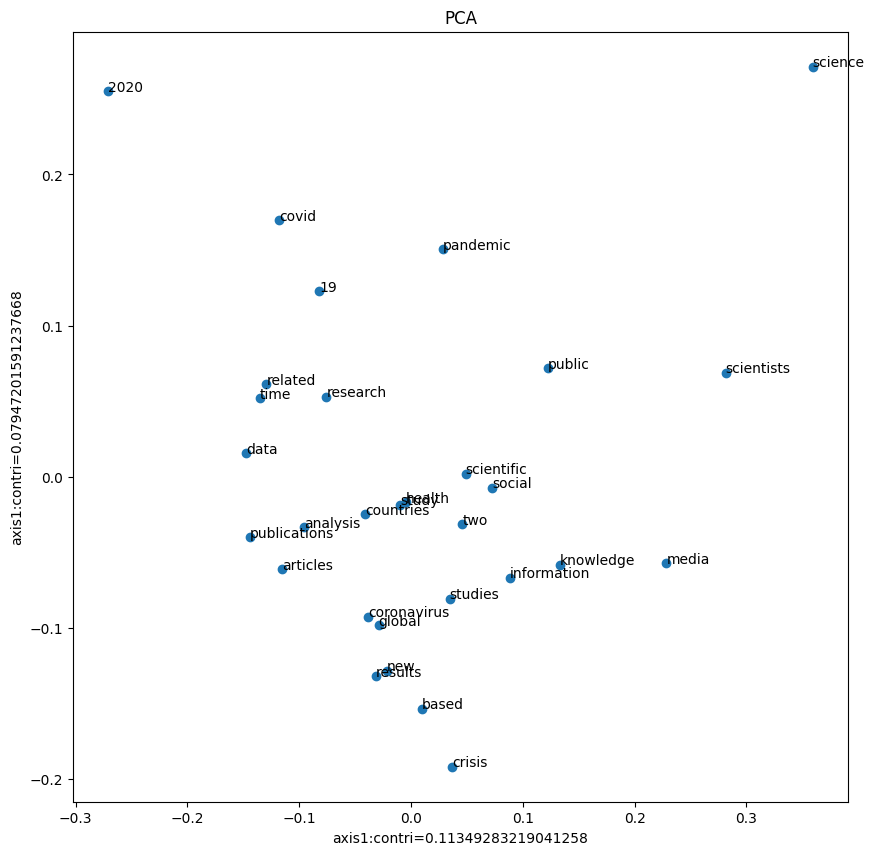

In [14]:
# TfidfVectorizerを使用してTF-IDFを計算
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(text_strings)
# 列名（単語）を取得
feature_names = vectorizer.get_feature_names_out()

# TF-IDFの値が最も高い10単語を選択
top_10_words = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names).sum().sort_values(ascending=False).head(30).index

# 選択した単語だけのデータフレームを作成
selected_word_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)[top_10_words]

# PCAのインスタンスを作成
pca = PCA(n_components=2)

# PCAを実行
pca_result = pca.fit_transform(selected_word_df.transpose())  # 転置して単語を行にする

# 結果をデータフレームに変換
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'], index=selected_word_df.columns)

# 寄与率を取得
explained_var_ratio = pca.explained_variance_ratio_

print("Explained Variance Ratio:")
for i, ratio in enumerate(explained_var_ratio):
    print(f"PC{i+1}: {ratio:.4f}")

# 散布図の作図設定
plt.figure(figsize=(10, 10))  # グラフのサイズを大きくする
plt.scatter(pca_df['PC1'], pca_df['PC2'], marker='o')

# ラベルを追加
for word in pca_df.index:
    plt.annotate(word, (pca_df.loc[word, 'PC1'], pca_df.loc[word, 'PC2']))

# 散布図の描画
plt.title("PCA")
plt.xlabel(f"axis1:contri={explained_var_ratio[0]}")
plt.ylabel(f"axis1:contri={explained_var_ratio[1]}")
plt.show()



# 単語(3D)

Explained Variance Ratio:
PC1: 0.1135
PC2: 0.0795
PC3: 0.0722


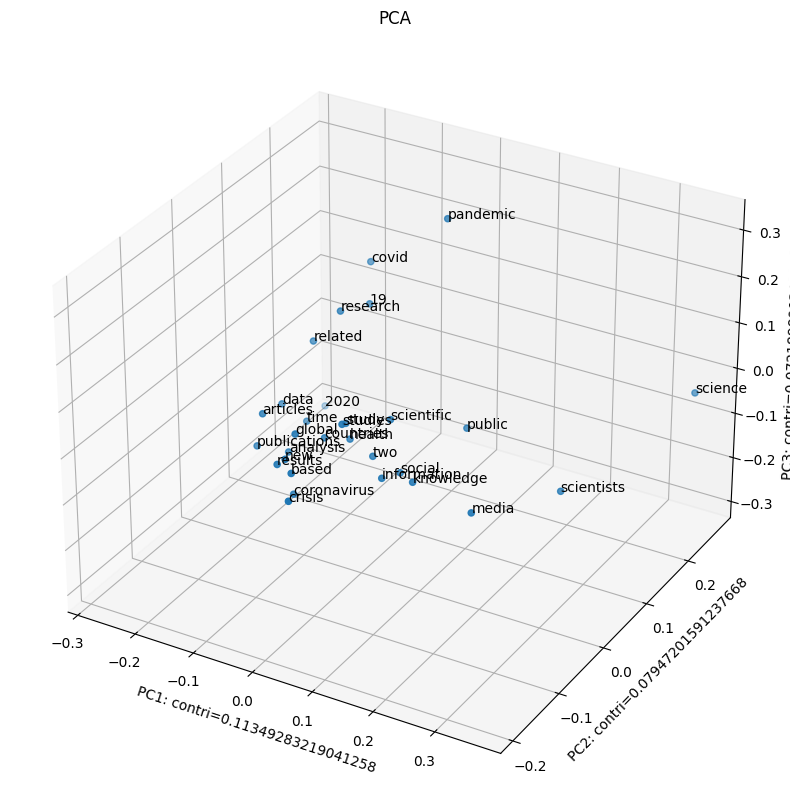

In [15]:
# PCAのインスタンスを作成（3次元）
pca = PCA(n_components=3)

# PCAを実行
pca_result = pca.fit_transform(selected_word_df.transpose())  # 転置して単語を行にする

# 結果をデータフレームに変換
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3'], index=selected_word_df.columns)

# 寄与率を取得
explained_var_ratio = pca.explained_variance_ratio_

print("Explained Variance Ratio:")
for i, ratio in enumerate(explained_var_ratio):
    print(f"PC{i+1}: {ratio:.4f}")

# 3次元散布図の作図設定
fig = plt.figure(figsize=(10, 10))  # グラフのサイズを大きくする
ax = fig.add_subplot(111, projection='3d')

# 散布図のプロット
ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], marker='o')

# ラベルを追加
for word in pca_df.index:
    ax.text(pca_df.loc[word, 'PC1'], pca_df.loc[word, 'PC2'], pca_df.loc[word, 'PC3'], word)

# 散布図の描画
ax.set_title("PCA")
ax.set_xlabel(f"PC1: contri={explained_var_ratio[0]}")
ax.set_ylabel(f"PC2: contri={explained_var_ratio[1]}")
ax.set_zlabel(f"PC3: contri={explained_var_ratio[2]}")

plt.show()

# 文章(2D)

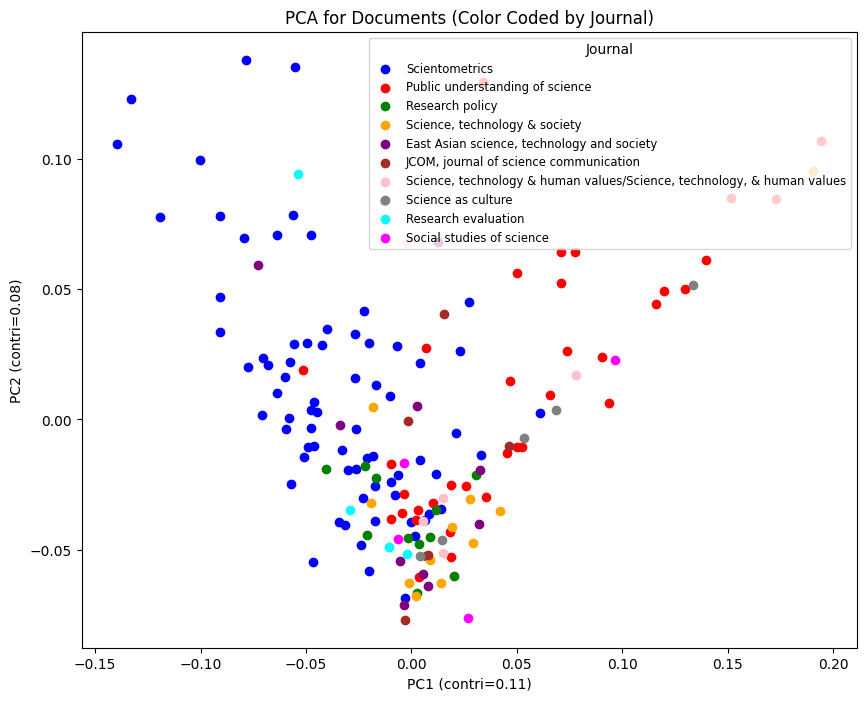

In [16]:
# PCAのインスタンスを作成
pca_doc = PCA(n_components=2)

# PCAを実行
pca_doc_result = pca_doc.fit_transform(selected_word_df)

# 結果をデータフレームに変換
pca_doc_df = pd.DataFrame(pca_doc_result, columns=['PC1', 'PC2'], index=selected_word_df.index)
pca_doc_df["journal"] = newdf["primary_location"]


import seaborn as sns

# ジャーナルごとの色を設定
journal_colors = {
    'Scientometrics': 'blue',
    'Public understanding of science': 'red',
    'Research policy': 'green',
    'Science, technology & society': 'orange',
    'East Asian science, technology and society': 'purple',
    'JCOM, journal of science communication': 'brown',
    'Science, technology & human values/Science, technology, & human values': 'pink',
    'Science as culture': 'gray',
    'Research evaluation': 'cyan',
    'Social studies of science': 'magenta'
}

# 寄与率を取得
explained_var_ratio = pca_doc.explained_variance_ratio_

# 散布図の作図設定
plt.figure(figsize=(10, 8))  # グラフのサイズを設定
for journal, color in journal_colors.items():
    mask = pca_doc_df['journal'] == journal
    plt.scatter(pca_doc_df[mask]['PC1'], pca_doc_df[mask]['PC2'], label=journal, color=color)

# ラベルと凡例の追加
plt.title("PCA for Documents (Color Coded by Journal)")
plt.xlabel(f"PC1 (contri={explained_var_ratio[0]:.2f})")
plt.ylabel(f"PC2 (contri={explained_var_ratio[1]:.2f})")
plt.legend(title="Journal", fontsize='small')
plt.show()


# 文章(3D)

In [18]:
# PCAのインスタンスを作成（3次元）
pca_doc_3d = PCA(n_components=3)

# PCAを実行
pca_doc_result_3d = pca_doc_3d.fit_transform(selected_word_df)

# 結果をデータフレームに変換
pca_doc_df_3d = pd.DataFrame(pca_doc_result_3d, columns=['PC1', 'PC2', 'PC3'], index=selected_word_df.index)
pca_doc_df_3d["journal"] = newdf["primary_location"]

explained_var_ratio_3d = pca_doc_3d.explained_variance_ratio_



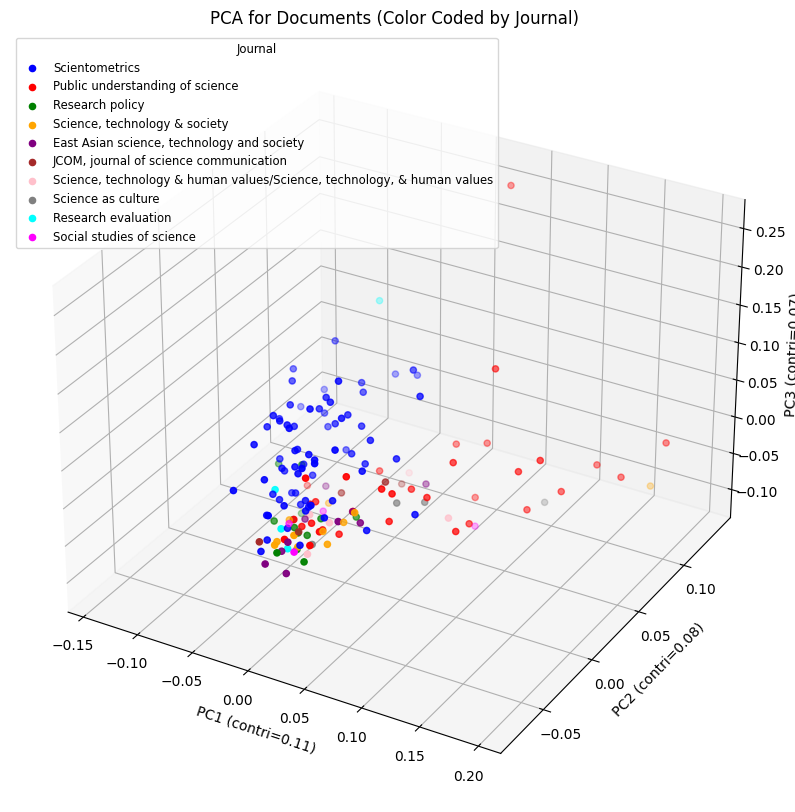

In [22]:
# 3次元散布図の作図設定
fig = plt.figure(figsize=(10, 10))  # グラフのサイズを設定
ax = fig.add_subplot(111, projection='3d')

# ジャーナルごとの色を設定
for journal, color in journal_colors.items():
    mask = pca_doc_df_3d['journal'] == journal
    ax.scatter(pca_doc_df_3d[mask]['PC1'], pca_doc_df_3d[mask]['PC2'], pca_doc_df_3d[mask]['PC3'], label=journal, color=color)

# ラベルと凡例の追加
ax.set_title("PCA for Documents (Color Coded by Journal)")
ax.set_xlabel(f"PC1 (contri={explained_var_ratio_3d[0]:.2f})")
ax.set_ylabel(f"PC2 (contri={explained_var_ratio_3d[1]:.2f})")
ax.set_zlabel(f"PC3 (contri={explained_var_ratio_3d[2]:.2f})")

# 凡例の設定
legend = ax.legend(title="Journal", fontsize='small')
plt.setp(legend.get_title(), fontsize='small')  # 凡例タイトルのフォントサイズを設定

plt.show()


# **UMAP**

# 文章(2D)

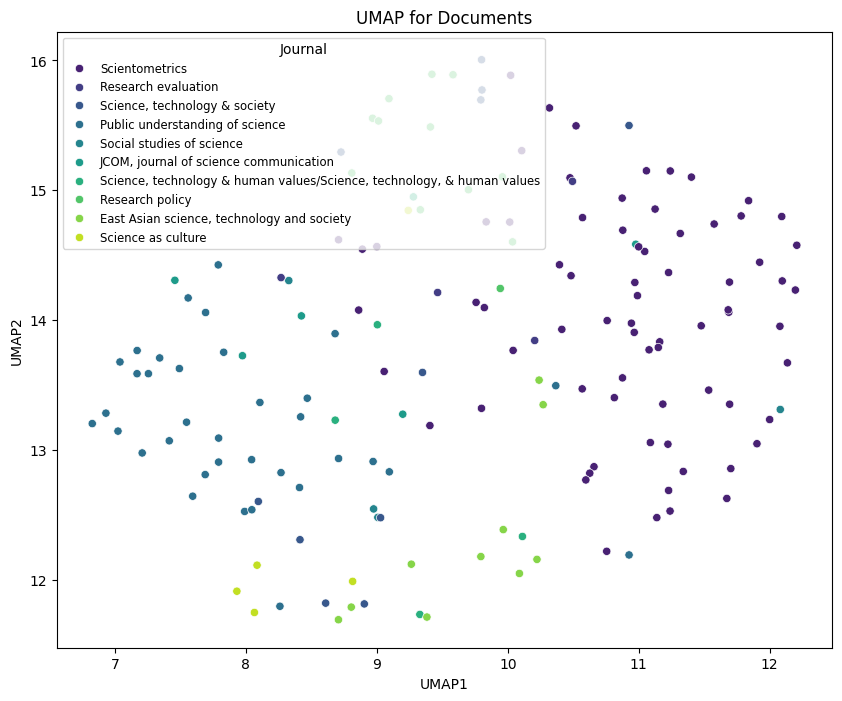

In [23]:
umap_model = umap.UMAP(n_components=2)

# UMAPを実行
umap_result = umap_model.fit_transform(tfidf_matrix)

# 結果をデータフレームに変換
umap_df = pd.DataFrame(umap_result, columns=['UMAP1', 'UMAP2'])

# ジャーナル情報を追加
umap_df["journal"] = newdf["primary_location"]

# 散布図の作成
plt.figure(figsize=(10, 8))
sns.scatterplot(data=umap_df, x='UMAP1', y='UMAP2', hue='journal', palette='viridis', legend='full')
plt.title("UMAP for Documents")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.legend(title="Journal", fontsize='small')
plt.show()

# ジャーナルで色分け

In [29]:
random.seed(2024)

NameError: name 'random' is not defined

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


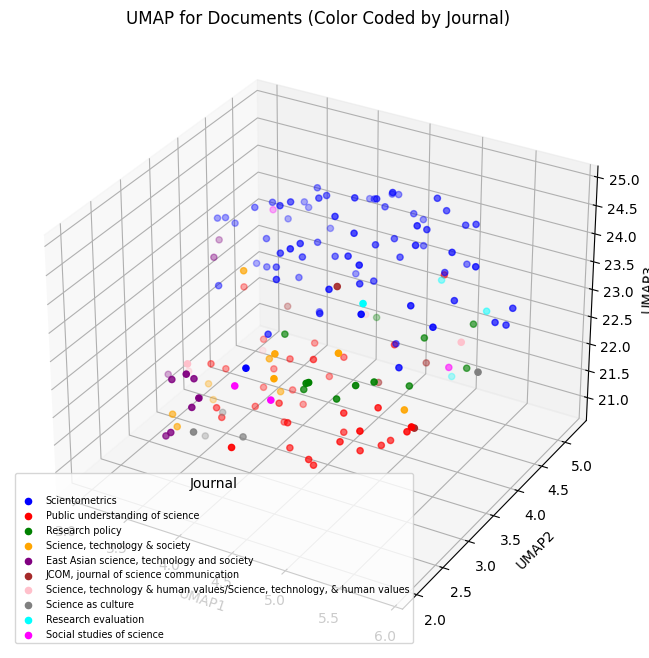

In [38]:
##3次元

umap_model_3d = umap.UMAP(n_components=3, n_jobs=-1, random_state=22)

# UMAPを実行
umap_result_3d = umap_model_3d.fit_transform(tfidf_matrix)

# 結果をデータフレームに変換
umap_df_3d = pd.DataFrame(umap_result_3d, columns=['UMAP1', 'UMAP2', 'UMAP3'])

# ジャーナル情報を追加
umap_df_3d["journal"] = newdf["primary_location"]

# 散布図の作成
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# ジャーナルごとの色を設定
journal_colors = {
    'Scientometrics': 'blue',
    'Public understanding of science': 'red',
    'Research policy': 'green',
    'Science, technology & society': 'orange',
    'East Asian science, technology and society': 'purple',
    'JCOM, journal of science communication': 'brown',
    'Science, technology & human values/Science, technology, & human values': 'pink',
    'Science as culture': 'gray',
    'Research evaluation': 'cyan',
    'Social studies of science': 'magenta'
}

for journal, color in journal_colors.items():
    mask = umap_df_3d['journal'] == journal
    ax.scatter(umap_df_3d[mask]['UMAP1'], umap_df_3d[mask]['UMAP2'], umap_df_3d[mask]['UMAP3'], label=journal, color=color)

# 凡例を設定
ax.legend(title="Journal", fontsize='x-small')

# グラフのタイトルと軸ラベルを設定
ax.set_title("UMAP for Documents (Color Coded by Journal)")
ax.set_xlabel("UMAP1")
ax.set_ylabel("UMAP2")
ax.set_zlabel("UMAP3")

plt.show()


# Field

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


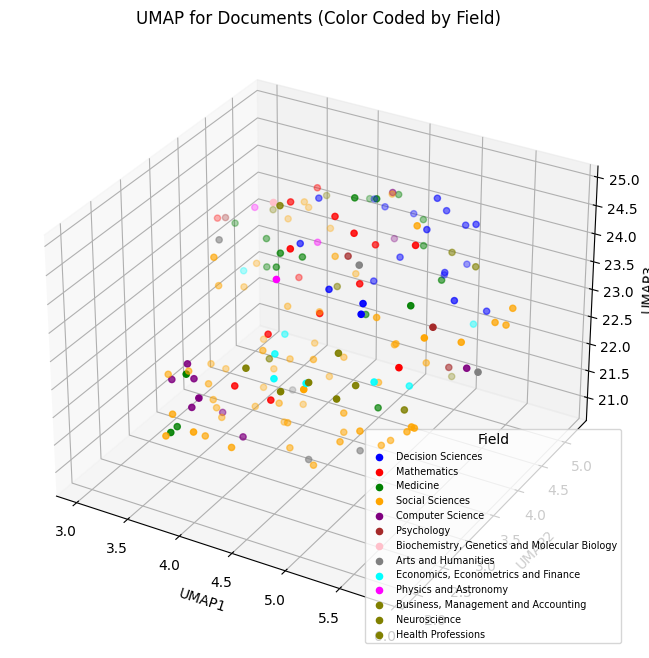

In [39]:
umap_model_3d = umap.UMAP(n_components=3, n_jobs=-1, random_state=22)

# UMAPを実行
umap_result_3d = umap_model_3d.fit_transform(tfidf_matrix)

# 結果をデータフレームに変換
umap_df_3d = pd.DataFrame(umap_result_3d, columns=['UMAP1', 'UMAP2', 'UMAP3'])

# ジャーナル情報を追加
umap_df_3d["primary_topic"] = newdf["primary_topic"]

# 散布図の作成
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# ジャーナルごとの色を設定
field_colors = {
    'Decision Sciences': 'blue',
    'Mathematics': 'red',
    'Medicine': 'green',
    'Social Sciences': 'orange',
    'Computer Science': 'purple',
    'Psychology': 'brown',
    'Biochemistry, Genetics and Molecular Biology': 'pink',
    'Arts and Humanities': 'gray',
    'Economics, Econometrics and Finance': 'cyan',
    'Physics and Astronomy': 'magenta',
    'Business, Management and Accounting': 'olive',
    'Neuroscience': 'olive',
    'Health Professions': 'olive'
}

for field, color in field_colors.items():
    mask = umap_df_3d["primary_topic"] == field
    ax.scatter(umap_df_3d[mask]['UMAP1'], umap_df_3d[mask]['UMAP2'], umap_df_3d[mask]['UMAP3'], label=field, color=color)

# 凡例を設定
ax.legend(title="Field", fontsize='x-small')

# グラフのタイトルと軸ラベルを設定
ax.set_title("UMAP for Documents (Color Coded by Field)")
ax.set_xlabel("UMAP1")
ax.set_ylabel("UMAP2")
ax.set_zlabel("UMAP3")

plt.show()